# Study Notes for *The Elements of Statistical Learning*

### Edited by Emma Teng

## Chapter 2 Overview of Supervised Learning 
### 2.1 Introduction

1. Termonologies for X and Y:
    
    - X: inputs, predictors, independent variables, features;
    - Y: outputs, reponses, dependent variables.

### 2.2 Variable Types and Terminology
1. The distinction in output type has led to a naming convention for the prediction tasks:
    
    - regression: when we predict quantitative outputs;
    - classification: when we predict qualitative outputs.  
1. Variable types include: quantitative, qualitative and ordered categorical.
1. The most useful and commonly used coding for *qualitative* variables are **dummy variables**. K-level qualitative variable is represented by a vector of K binary variables or bits, only one of which is “on” at a time.
1. Naming Convention: 
   - Inputs: X;
   - Quantitative ouputs: Y;
   - Qualitative outputs: G
   - Use uppercase letters such as X, Y or G when referring to the generic aspects of a variable. Observed values are written in lowercase; hence the *i*th observed value of X is written as $x_i$ (where $x_i$ is again a scalar or vector).
   - Matrices are represented by bold uppercase letters; for example, a set of N input p-vectors $x_i, i = 1, . . . ,N$ would be represented by the $N×p$ matrix X. 
   - The $i$th row of **X** is $x_i^T$, the vector transpose of $x_i$, because we assume all vectors are column vectors.

### 2.3 Two Simple Approaches to Prediction: Least Squares and Nearest Neighbors
#### 2.3.1 Linear Models and Least Square

1. The linear model is:
$$
\begin{align}
\hat{Y} & = \hat{\beta_0} + \sum_{j=1}^p X_j \hat{\beta_j} \\
& = X^T \hat{\beta}  \\
\end{align}
$$
where $X^T = (1, X_1, X_2, ..., X_p)$, $X$ is a $N\times p$ matrix.
2. Using Least Squares for finding unknown coefficients and the goal is to minimize the residual sum of squares: 
$$
\begin{align}
RSS(\beta) & = \sum_{i = 1}^N (y_i - x_i^T\beta)^2 \\
&=(\boldsymbol{y} - X\beta)^T(\boldsymbol{y}-X\beta)
\end{align}
$$
where $X$ is an $N\times p$ matrix with each row an input vector, and $\boldsymbol{y}$ is an $N$-vector of the ouputs in the training set.
$RSS(\beta)$ is a quadratic function of the parameters, and hence its minimum always exists, but may not be unique.
Differentiating w.r.t. $\beta$ we get the normal equations:
$$
\begin{align}
X^T(\boldsymbol{y} - X\beta) = 0
\end{align}
$$
If $X^TX$ is nonsingular, then the unique solution is given by
$$
\begin{align}
\hat{\beta} = (X^T X)^{-1} X^T \boldsymbol{y}
\end{align}
$$
3. Using linear model for classification:
    
    First code all classes as a binary variable, and then fit by linear regression. The decision boundary can be $x^T \hat{\beta} = 0.5$.
4. Two possible scenarios regarding to Linear Regression Classification performance:

    <span style="color:blue">Scenario 1:</span> The training data in each class were generated from bivariate Gaussian distributions with uncorrelated components and different means.
    
    Linear decision boundary is almost optimal.
    
    <span style="color:blue">Scenario 2:</span> The training data in each class came from a mixture of 10 low-variance Gaussian distributions, with individual means themselves distributed as Gaussian.
    
    Linear decision boundary is unlikely to be optimal.

#### 2.3.2 Nearest-Neighbor Methods

1. For classification, majority vote in the neighborhood will determine the class. For example, if $\hat{Y} > 0.5$, then assign class to class 1.
2. For 1-nearest-neighbor classification, each point has an associated tile bounding the region ofr which it is the closest input point.
3. For k-nearest-neighbor fits, the error on the training data should be approximately an increasing function of k, and will always be 0 for $k=1$. (OVERFITTING)
4. The effective number of parameters of k-nearest neighbors is $N/k$ and is generally bigger than least-square parameter $p$, and decreases with increasing $k$.
> For example, if the neighborhoods were nonoverlapping, there would be $N/k$ neighborhoods (the number of classes) and we would fit one parameter (mean) in each neighborhood.
5. We shouldn't use sum-of-squared errors on the raining set as a criterion for kicking $k$, since we would always pick $k=1$ (COMPLETELY OVERFITTING).

6. k-nearset neighbor can find a non-linear decision boundary, which is good for the Gaussian mixture model in <span style="color:blue">Scenario 2</span>.

#### 2.3.3 From Least Square to Nearest Neighbors
1. Least Squares Classification rely heavily on the assumption that a linear decision boundary is appropriate and has low variance but high bias.
2. k-nearest neighbor has no assumptions about the underlying data and has high variance but low bias (wiggly and unstable).
3. A large subset of the most popular techniques in use today are variants of these two simple procedures. For example:   
    - Kernel methods use weights that decrease smoothly to zero with distance from the target point, rather than the effective 0 or 1 weights used by k-nearest neighbors.
    - In high-dimensional spaces the distance kernels are modified to emphasize some variable more than others, like PCA.
    - Local regression fits linear models by locally weighted least squares, rather than fitting constants locally.
    - Linear models fit to a basis expansion of the original inputs allow arbitrarily complex models, like Splines.
    - Projection pursuit and neural network models consist of sums of non-linearly transformed linear models.
    

### 2.4 Statistical Decision Theory

1. If we use squared error loss as loss function $L(Y, f(X)) = (Y-f(X))^2$, the solution is
$$f(x) = E(Y|X=x) $$
    Both k-nearest neighbors and least squares end up approximating conditional expectations by averages.

    - k-nearest neighbor: $\hat{f}(x) = Ave(y_i|x_i \in N_k(x))$.
    - least squares: $\beta = [E(XX^T)] ^{-1}E(XY)$
    
    But they differ dramatically in terms of model assumptions:
    
    - Least squares assumes $f(x)$ is well approximated by a globally linear function.
    - k-nearest neighbors assumes $f(x)$ is well approximated by a locally constant function.
2. The dummy-variable regression procedure, followed by classification to the largest fitted value, is another way of representing the Bayes classifier.



### 2.5 Local Methods in High Dimensions

1. mean squared error(bias-variance decomposition):
\begin{align}
MSE(x) & = E[f(x) - \hat{y} ] \\
& = Var(\hat{y}) + Bias^2(\hat{y})  \\
\end{align}
2. Relationship between MSE and SSE:
$$MSE = \frac{1}{N} SSE = \frac{1}{N} \sum (f_i -y_i)^2$$
3. If the relationship between Y and X is linear, then Least squares estimates are BLUE(Best Linear Unbiased Estimator), meaning it is the estimator with smallest variance and no biase.

### 2.6 Statistical Models, Supervised Learning and Function Approximation
#### 2.6.1 A statistical Model for the Joint Distribution Pr(X, Y)

1. The additive error model:
$$Y = f(X) + \epsilon $$
where the random error $\epsilon$ has $E(\epsilon) = 0$ and is independent of X. 
    Generally there will be other unmeasured variables that also contribute to Y , including measurement error. The additive model assumes that we can capture all these departures from a deterministic relationship via the error $\epsilon$.
    > The error term changes the model from deterministic model (no randomness envolved) to error-based model.
2. The assumption for the additive error model that the errors are i.i.d (independent and identically distributed) is not strictly necessary. Simple modifications can be made to avoid the independence assumption, such as:
$$Var(Y|X=x) = \sigma (x) $$
3. Additive error models are typically not used for qualitative ouputs $G$; in this case the target function $p(X)$ is the conditional density $Pr(G|X)$, and this is modeled directly.

#### 2.6.2 Function Approximation

1. Treating supervised learning as a problem in function approximation encourages the geometrical concepts of Euclidean spaces and mathematical concepts of probabilistic inference to be applied to the problem.
2. Two methods for estimating parameters $\theta$:
    - Least sqares: minimize $RSS(\theta)$ (residual sum-of-squares)
$$RSS(\theta) =  \sum_{i = 1}^N (y_i - f_\theta(x_i))^2$$
> For the linear model we get a simple closed form solution to the minimization problem. Otherwise the solution requires either iterative methods or numerical optimization.
    - maximum likelihood estimation: a more generalized principle for estimation.
    > The principle of maximum likelihood assumes that the most reasonable values for θ are those for which the probability of the observed sample is largest.
    $$L(\theta) = \sum_{i = 1}^N log Pr_\theta(y_i)  $$
    
**Relationship between Least squares and MLE:** <br>
Least squares for the additive error model $Y = f_\theta(X) + \epsilon $, with $\epsilon \sim N(0, \sigma^2)$, is equivalent to maximum likelihood using the conditional likelihood
$$Pr(Y|X,\theta) = N(f_\theta(X), \sigma^2) $$
The log-likelihood of the data is
$$L(\theta) = -\frac{N}{2} log(2\pi) - N log\sigma - \frac{1}{2\sigma^2}\sum_{i = 1}^N (y_i - f_\theta(x_i))^2 $$
and the only term involving $\theta$ is the last, which is $RSS(\theta)$ up to a scalar negative multiplier.   

### 2.7 Structured Regression Models
1. Minimizing $RSS(\theta)$ leads to infinitely many solutions: any function $\hat{f}$ passing through the training points $(x_i, y_i)$ is a solution.

2. In order to obtain useful results for finite N, we must restrict the eligible solutions to RSS to a smaller set of functions.

3. In general the constraints imposed by most learning methods can be described as complexity restrictions of one kind or another.

4. The strength of the constraint is dictated by the neighborhood size. The larger the size of the neighborhood, the stronger the constraint, and the more sensitive the solution is to the particular choice of constraint.

5. Any method that attempts to produce locally varying functions in small isotropic neighborhoods will run into problems in high dimensions—again the curse of dimensionality. And conversely, all methods that overcome the dimensionality problems have an associated—and often implicit or adaptive—metric for measuring neighborhoods, which basically does not allow the neighborhood to be simultaneously small in all directions.

### 2.8 Classes of Restricted Estimators
#### 2.8.1 Roughness Penalty and Bayesian Methods
1. Smoothing spline is the solution to the penalized least-squares criterion (PRSS).
$$PRSS(f, \lambda) =  \sum_{i = 1}^N (y_i - f(x_i))^2 + \lambda \int [f''(x)]^2 dx $$
the class of functions is controlled by *explicitly* penalizing RSS(f) with a roughness penalty.
2. Penalty function, or regularization methods, express our prior belief that the type of functions we seek exhibit a certain type of smooth behavior, and indeed can usually be cast in a **Bayesian** framework.

#### 2.8.2 Kernel Methods and Local Regression
1. These methods can be thought of as explicitly providing estimates of the regression function or conditional expectation by specifying the nature of the local neighborhood, and of the class of regular functions fitted locally.
    > The local neighborhood is specified by a kernel function $K_\lambda (x_0, x)$ which assigns weights to points x in a region around $x_0$.
2. Gaussian kernel:
$$K_\lambda (x_0, x) = \frac{1}{\lambda} exp\left[-\frac{||x-x_0||^2}{2\lambda}  \right] $$
assigns weights to points that die exponentially with their squared Euclidean distance from $x_0$. <br>
The parameter $\lambda$ corresponds to the variance of the Gaussian density, and controls the width of the neighborhood.
3. In general we can define a local regression estimate of $f(x_0)$ as $f_{\hat{\theta}}(x_0)$,where $\hat{\theta}$ minimizes
$$RSS(f_\theta, x_0) = \sum_{i = 1}^N K_\lambda(x_0, x_i)(y_i - f_\theta(x_i))^2 $$
and $f_\theta$ is some parameterized function, such as a low-order polynomial.

    Some examples are: <br>
    - $f_\theta(x) = \theta_0$, the constant function; this results in the Nadaraya–Watson weighted average estimate:
    $$\hat{f}(x_0) = \frac{\sum_{i = 1}^N K_\lambda(x_0, x_i) y_i}{\sum_{i = 1}^N K_\lambda(x_0, x_i)} $$
    - $f_\theta(x) = \theta_0 + \theta_1x$ gives the popular local linear regression model.
    
    > Nearest-neighbor methods can be thought of as kernel methods having a more data-dependent metric. Indeed, the metric for k-nearest neighbors is
    
    $$K_k(x, x_0) = I(||x − x_0|| ≤ ||x(k) − x_0||) $$
    
    where x(k) is the training observation ranked $k$th in distance from $x_0$, and I(S) is the indicator of the set S.

####  2.8.3 Basis Functions and Dictionary Methods
1. Polynomial splines:
$$ f_\theta(x) = \sum_{m = 1}^M \theta_m h_m(x) $$
    For one-dimensional x, polynomial splines of degree K can be represented by an appropriate sequence of M spline basis functions, determined in turn by M − K knots.
2. Radial basis functions are symmetric p-dimensional kernels located at particular centroids:
$$  f_\theta(x) = \sum_{m = 1}^M K_{\lambda_m}(\mu_m, x)\theta_m $$
3. single-layer feed-forward neural network model with linear output weights can be thought of as an adaptive basis function method. The model has the formsingle-layer feed-forward neural network model with linear output weights can be thought of as an adaptive basis function method. The model has the form:
$$ f_\theta(x) = \sum_{m = 1}^M \beta_m \sigma(\alpha_m^T x + b_m) $$
where $\sigma(x) = 1/(1+e^{-x})$ is known as the activation function.


### 2.9 Model Selection and the Bias–Variance Tradeoff
1. If we only use sum-of-squares on the training data to determine parameters as well, since we would always pick those that gave interpolating fits and hence zero residuals. Such a model is unlikely to predict future data well at all.
2. If we choose to use *squared error loss*: $L(Y, \hat{f}(X)) = (Y-\hat{f}(X))^2$ for loss function, the expected (squarred) predicion error is:
$$
\begin{align}
EPE(X) &= E[(Y − \hat{f}(x))^2] \\
&= E[(Y − f(x) + f(X) - \hat{f}(x))^2]\\
&= E[(Y − f(x))^2 + (f(X) - \hat{f}(x))^2 + 2(Y − f(x))(f(X) - \hat{f}(x))]\\
\end{align}
$$
Suppose the data arise from a model Y = f(X) + ε, with E(ε) = 0 and $Var(\epsilon) = \sigma^2$.
$$
\begin{align}
EPE(X) &= E[(Y − f(x))^2] + E[(f(X) - \hat{f}(x))^2] + 2E[\epsilon * (f(X) - \hat{f}(x))]\\
&= Var(\epsilon)+(E[\epsilon)])^2 + Var(f(X) - \hat{f}(x)) + (E[f(X) - \hat{f}(x)])^2 + 0\\
&= \sigma^2 + Var(\hat{f}(X)) + Bias^2(\hat{f}(X))
\end{align}
$$
    There are three terms in this expression:
    - The first term $\sigma^2$ is the irreducible error—the variance of the new test target—and is beyond our control, even if we know the true $f(x_0)$.
    - The second and third terms are under our control, and make up the mean squared error of \hat{f}(x) in estimating $f(X)$, $E[(f(X) - \hat{f}(x))^2]$, which is broken down into a bias component and a variance component.
3. More generally, as the model complexity of our procedure is increased, the variance tends to increase and the squared bias tends to decreases. The opposite behavior occurs as the model complexity is decreased. For k-nearest neighbors, the model complexity is controlled by k.
4. 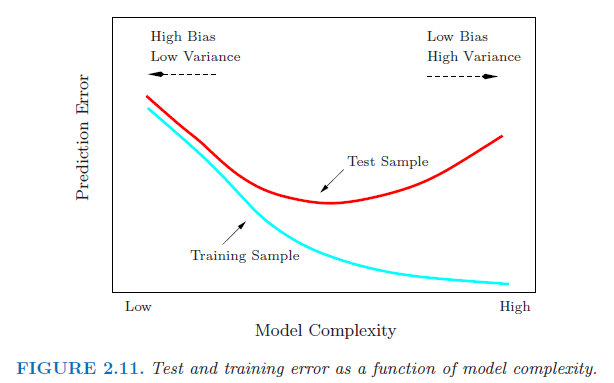